### 11.1 | Geoestatistica

In [ ]:
  # Aula explicando os diferentes métodos. A interpolação usa diferentes métodos, como IDW, Krigagem (usa-se média ponderada).

### 11.2 | GDAL GRID

In [ ]:
# Aula só mostrando a wikipedia do GDAL e a documentação do GDAL Grid que é utlizada para os cálculos de interpolação.

### 11.3 | Interpolação de Dados

In [1]:
from osgeo import gdal
from osgeo import ogr

In [4]:
pontos = ogr.Open(r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\pontos.shp")
layer = pontos.GetLayer()

In [5]:
layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x000001FBE98C8B10> >

In [6]:
for campos in layer.schema:
    print(campos.name)

id
precip


In [9]:
#precisa fazer isso para receber os dados da interpolação
pontos = layer = None

In [8]:
pontos

In [11]:
# utilizar o método do vizinho (nearest)
out_file = r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\int_nearest.tif"
pontos = r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\pontos.shp"

In [12]:
vizinhos = gdal.Grid(out_file, 
                     pontos,
                     zfield="precip", #coluna para interpolação
                     algorithm='nearest') # algoritmo de interpolação
vizinhos = None

### 11.4 | Interpolação IDW
Ela é realizada através de uma interpolação. Atribui pesos as amostras

In [13]:
out_file = r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\idw.tif"
pontos = r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\pontos.shp"

In [14]:
idw = gdal.Grid(out_file,
                pontos,
                zfield='precip',
                algorithm="invdist")
idw = None

### 11.5 | Interpolação por Krigagem
É um meio de regressão usado em geoestatística

In [15]:
!pip install pykrige

   ---------------------------------------- 0.0/183.9 kB ? eta -:--:--
   ------ -------------------------------- 30.7/183.9 kB 660.6 kB/s eta 0:00:01
   ------------------------ --------------- 112.6/183.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 183.9/183.9 kB 1.4 MB/s eta 0:00:00


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import geopandas as gpd

In [37]:
data = gpd.read_file(r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\dados1.shp")
data.head()

id  temp                          geometry
0  83595  27.3  POINT (1545309.085 -2185958.310)
1  83442  26.5  POINT (1456767.842 -1882885.117)
2  83579  22.4   POINT (925030.892 -2172880.121)
3  83384  25.8  POINT (1024310.820 -1765714.226)
4  83582  23.6  POINT (1022502.918 -2222733.205)

In [38]:
data.shape

(64, 3)

In [39]:
data.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["WGS_1 ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 22N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
data_x = data['geometry'].x
data_y = data['geometry'].y
data_temp = data['temp']

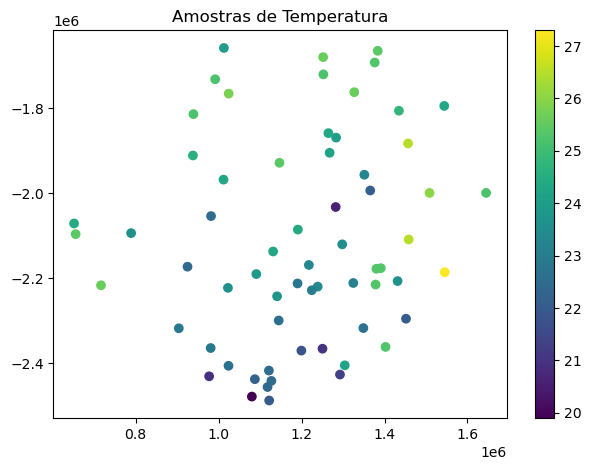

In [41]:
ax = plt.scatter(data_x, data_y, c=data_temp)
cbar = plt.colorbar(ax)
plt.title("Amostras de Temperatura")
plt.tight_layout()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 3.693680072957127
Full Sill: 3.693680072957127
Range: 879259.1866237621
Nugget: 5.604505468459595e-17 



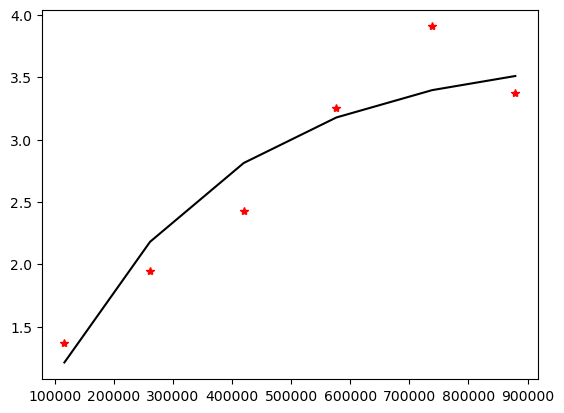

Calculating statistics on variogram model fit...


In [42]:
OK = OrdinaryKriging (
    data_x,
    data_y,
    data_temp,
    variogram_model="exponential",
    verbose=True,
    enable_plotting=True,    
)

In [43]:
OK

In [54]:
#Valores retirados baseado no primeiro mapa, cria uma grade retangular de pontos
gridx = np.arange(600000, 1650000, 1000, dtype='float64')
gridy = np.arange(-2600000, -1650000, 1000, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



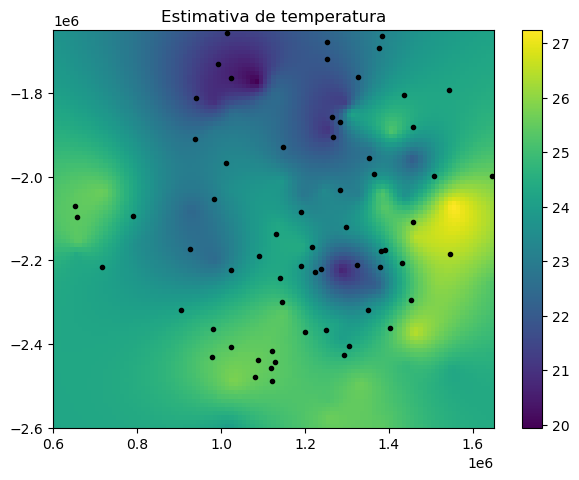

In [53]:
cax = plt.imshow(zstar, extent=(600000, 1650000, -2600000, -1650000))
plt.scatter(data_x, data_y, c="k", marker='.')
cbar=plt.colorbar(cax)
plt.title('Estimativa de temperatura')
plt.tight_layout()

In [55]:
out_file = r"C:\Users\cindy\Documents\python-geodev-arquivos\Modulo 11\Dados_aula\krig_temp.tif"

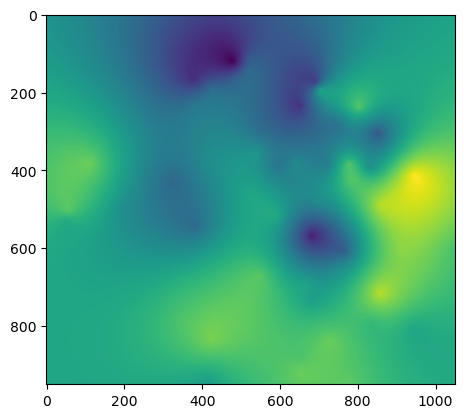

In [58]:
kt.write_asc_grid(gridx, gridy, zstar, filename=out_file)
plt.imshow(zstar)
plt.show()

In [ ]:
#Acabou as aulas e eu nao entendi a aplicação